# non-linear pde- prey predator model - lotka volterra
 dx/dt = ax - bxy

 dy/dt = cxy - dy              initial cond : x= 10, y= 1, find y and x

 a = 0.1

 b = 0.4

 c = 0.1
 
 d = 0.4

In [1]:
import torch
import numpy as np
import torch.nn as nn
from torch.autograd import Variable
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [2]:
lr = torch.nn.LeakyReLU(0.1)

In [4]:

class Net_x(nn.Module):
    def __init__(self):
        super(Net_x, self).__init__()
        self.hidden_layer1 = nn.Linear(1,1)
        #self.hidden_layer2 = nn.Linear(5,5)
        #self.hidden_layer3 = nn.Linear(5,5)
        #self.hidden_layer4 = nn.Linear(5,5)
        #self.hidden_layer5 = nn.Linear(5,5)
        self.output_layer = nn.Linear(1,1)

    def forward(self,t):
        inputs = torch.cat([t],axis=1) # combined two arrays of 1 columns each to one array of 2 columns
        layer1_out = lr(self.hidden_layer1(inputs))
        #layer2_out = torch.sigmoid(self.hidden_layer2(layer1_out))
        #layer2_int = layer1_out + layer2_out
        #layer3_out = torch.sigmoid(self.hidden_layer3(layer2_int))
        #layer4_out = torch.sigmoid(self.hidden_layer4(layer3_out))
        #layer4_int = layer3_out + layer4_out
        #layer5_out = torch.sigmoid(self.hidden_layer5(layer4_int))
        # output_ = torch.relu(layer1_out)
        output_ = self.output_layer(layer1_out) ## For regression, no activation is used in output layer
        output = torch.relu(output_) + 1
        return output

In [5]:

class Net_y(nn.Module):
    def __init__(self):
        super(Net_y, self).__init__()
        self.hidden_layer1 = nn.Linear(1,1)
        #self.hidden_layer2 = nn.Linear(5,5)
        #self.hidden_layer3 = nn.Linear(5,5)
        #self.hidden_layer4 = nn.Linear(5,5)
        #self.hidden_layer5 = nn.Linear(5,5)
        self.output_layer = nn.Linear(1,1)

    def forward(self, t):
        inputs = torch.cat([t],axis=1) # combined two arrays of 1 columns each to one array of 2 columns
        layer1_out = lr(self.hidden_layer1(inputs))
        #layer2_out = torch.sigmoid(self.hidden_layer2(layer1_out))
        #layer2_int = layer1_out + layer2_out
        #layer3_out = torch.sigmoid(self.hidden_layer3(layer2_int))
        #layer4_out = torch.sigmoid(self.hidden_layer4(layer3_out))
        #layer4_int = layer3_out + layer4_out
        #layer5_out = torch.sigmoid(self.hidden_layer5(layer4_int))
        output = torch.relu(self.output_layer(layer1_out)) ## For regression, no activation is used in output layer
        return output

In [5]:

class Net_y_(nn.Module):
    def __init__(self):
        super(Net_y, self).__init__()
        self.hidden_layer1 = nn.Linear(1,5)
        self.hidden_layer2 = nn.Linear(5,5)
        self.hidden_layer3 = nn.Linear(5,5)
        self.hidden_layer4 = nn.Linear(5,5)
        self.hidden_layer5 = nn.Linear(5,5)
        self.output_layer = nn.Linear(5,1)

    def forward(self, t):
        inputs = torch.cat([t],axis=1) # combined two arrays of 1 columns each to one array of 2 columns
        layer1_out = torch.sigmoid(self.hidden_layer1(inputs))
        layer2_out = torch.sigmoid(self.hidden_layer2(layer1_out))
        layer3_out = torch.sigmoid(self.hidden_layer3(layer2_out))
        layer4_out = torch.sigmoid(self.hidden_layer4(layer3_out))
        layer5_out = torch.sigmoid(self.hidden_layer5(layer4_out))
        output = self.output_layer(layer5_out) ## For regression, no activation is used in output layer
        return output

In [6]:
### (2) Model
net_x = Net_x()
net_y = Net_y()
net_x = net_x.to(device)
net_y = net_y.to(device)
mse_cost_function = torch.nn.MSELoss() # Mean squared error
optimizer = torch.optim.Adam(list(net_x.parameters())+ list(net_y.parameters()))

In [7]:
## PDE as loss function. Thus would use the network which we call as u_theta
def f(t, net_x, net_y):
    u = net_x(t) # the dependent variable u is given by the network based on independent variables x,t
    v = net_y(t)
    
    u_t = torch.autograd.grad(u.sum(), t, create_graph=True)[0]
    v_t = torch.autograd.grad(v.sum(), t, create_graph=True)[0]
    

    pde_1 = u_t - 1.1*u + 0.4*u*v
    pde_2 =v_t - 0.1*u*v + 0.4*v
    
    return pde_1, pde_2

In [8]:
# b.c ==> u(0) = 2000   and v(0) = 6000
t_bc = np.zeros((500,1))
u_bc = 10*np.ones((500,1))
v_bc = 1*np.ones((500,1))

In [9]:
u_bc

array([[10.],
       [10.],
       [10.],
       [10.],
       [10.],
       [10.],
       [10.],
       [10.],
       [10.],
       [10.],
       [10.],
       [10.],
       [10.],
       [10.],
       [10.],
       [10.],
       [10.],
       [10.],
       [10.],
       [10.],
       [10.],
       [10.],
       [10.],
       [10.],
       [10.],
       [10.],
       [10.],
       [10.],
       [10.],
       [10.],
       [10.],
       [10.],
       [10.],
       [10.],
       [10.],
       [10.],
       [10.],
       [10.],
       [10.],
       [10.],
       [10.],
       [10.],
       [10.],
       [10.],
       [10.],
       [10.],
       [10.],
       [10.],
       [10.],
       [10.],
       [10.],
       [10.],
       [10.],
       [10.],
       [10.],
       [10.],
       [10.],
       [10.],
       [10.],
       [10.],
       [10.],
       [10.],
       [10.],
       [10.],
       [10.],
       [10.],
       [10.],
       [10.],
       [10.],
       [10.],
       [10.],
      

In [10]:
### (3) Training / Fitting
iterations = 199999
epoch = 0
loss =  torch.tensor(10000)
#previous_validation_loss = 99999999.0
#for epoch in range(iterations):
while True :
    epoch += 1
    optimizer.zero_grad() # to make the gradients zero
    
    # Loss based on boundary conditions
    #pt_x_bc = Variable(torch.Tensor(x_bc).float(), requires_grad=False).to(device)
    pt_t_bc = Variable(torch.Tensor(t_bc).float(), requires_grad=False).to(device)
    pt_u_bc = Variable(torch.Tensor(u_bc).float(), requires_grad=False).to(device)
    pt_v_bc = Variable(torch.Tensor(v_bc).float(), requires_grad=False).to(device)

    
    net_u_bc_out = net_x(pt_t_bc) # output of u(x,t)
    mse_u_bc = mse_cost_function(net_u_bc_out, pt_u_bc)

    net_v_bc_out = net_y(pt_t_bc) # output of u(x,t)
    mse_v_bc = mse_cost_function(net_v_bc_out, pt_v_bc)
    
    # Loss based on PDE
    #x_collocation = np.random.uniform(low=0.0, high=2.0, size=(500,1))
    t_collocation = np.linspace(0,500,500).reshape((500,1))
    all_zeros_1 = np.zeros((500,1))
    all_zeros_2 = np.zeros((500,1))
    
    
    #pt_x_collocation = Variable(torch.Tensor(x_collocation).float(), requires_grad=True).to(device)
    pt_t_collocation = Variable(torch.Tensor(t_collocation).float(), requires_grad=True).to(device)
    pt_all_zeros_1 = Variable(torch.Tensor(all_zeros_1).float(), requires_grad=False).to(device)
    pt_all_zeros_2 = Variable(torch.Tensor(all_zeros_1).float(), requires_grad=False).to(device)

    
    pde_1, pde_2 = f(pt_t_collocation, net_x, net_y) # output of the differential eqn
    mse_f_1 = mse_cost_function(pde_1, pt_all_zeros_1)
    mse_f_2 = mse_cost_function(pde_2, pt_all_zeros_2)
    
    # Combining the loss functions
    loss = mse_u_bc + mse_v_bc  + mse_f_1 + mse_f_2
    
    
    loss.backward() # This is for computing gradients using backward propagation
    optimizer.step() # This is equivalent to : theta_new = theta_old - alpha * derivative of J w.r.t theta

    with torch.autograd.no_grad():
    	print(epoch,"Traning Loss:",loss.data)

    if (loss.item() <= 0.00005):
                        break

        

1 Traning Loss: tensor(7614.0654)
2 Traning Loss: tensor(7421.2627)
3 Traning Loss: tensor(7228.4917)
4 Traning Loss: tensor(7044.2295)
5 Traning Loss: tensor(6895.7842)
6 Traning Loss: tensor(6776.8379)
7 Traning Loss: tensor(6679.5010)
8 Traning Loss: tensor(6597.8970)
9 Traning Loss: tensor(6527.7783)
10 Traning Loss: tensor(6466.1270)
11 Traning Loss: tensor(6410.7793)
12 Traning Loss: tensor(6360.1855)
13 Traning Loss: tensor(6313.2261)
14 Traning Loss: tensor(6269.0889)
15 Traning Loss: tensor(6227.1719)
16 Traning Loss: tensor(6187.0332)
17 Traning Loss: tensor(6148.3311)
18 Traning Loss: tensor(6110.8115)
19 Traning Loss: tensor(6074.2783)
20 Traning Loss: tensor(6038.5767)
21 Traning Loss: tensor(6003.5884)
22 Traning Loss: tensor(5969.2188)
23 Traning Loss: tensor(5935.3877)
24 Traning Loss: tensor(5902.0400)
25 Traning Loss: tensor(5869.1221)
26 Traning Loss: tensor(5836.5947)
27 Traning Loss: tensor(5804.4277)
28 Traning Loss: tensor(5772.5889)
29 Traning Loss: tensor(5741.

KeyboardInterrupt: 

# Test

In [18]:
#t_test_collocation = np.random.uniform(low=0.0, high=10.0, size=(500,1))
t_test_collocation = np.linspace(0,5000,500).reshape((500,1))
pt_t_test_collocation = Variable(torch.Tensor(t_test_collocation).float(), requires_grad=True).to(device)

In [19]:
prey_val = net_x(pt_t_test_collocation)

In [20]:
predator_val = net_y(pt_t_test_collocation)

In [21]:
prey_val[-1]

tensor([1.], grad_fn=<SelectBackward0>)

In [22]:
predator_val[-1]

tensor([9.5559], grad_fn=<SelectBackward0>)

In [23]:
torch.autograd.grad(prey_val.sum(), pt_t_test_collocation, create_graph=True)[0][:-10]

tensor([[-1.8151],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.

In [25]:
torch.autograd.grad(predator_val.sum(), pt_t_test_collocation, create_graph=True)[0][:-10]

tensor([[0.0017],
        [0.0017],
        [0.0017],
        [0.0017],
        [0.0017],
        [0.0017],
        [0.0017],
        [0.0017],
        [0.0017],
        [0.0017],
        [0.0017],
        [0.0017],
        [0.0017],
        [0.0017],
        [0.0017],
        [0.0017],
        [0.0017],
        [0.0017],
        [0.0017],
        [0.0017],
        [0.0017],
        [0.0017],
        [0.0017],
        [0.0017],
        [0.0017],
        [0.0017],
        [0.0017],
        [0.0017],
        [0.0017],
        [0.0017],
        [0.0017],
        [0.0017],
        [0.0017],
        [0.0017],
        [0.0017],
        [0.0017],
        [0.0017],
        [0.0017],
        [0.0017],
        [0.0017],
        [0.0017],
        [0.0017],
        [0.0017],
        [0.0017],
        [0.0017],
        [0.0017],
        [0.0017],
        [0.0017],
        [0.0017],
        [0.0017],
        [0.0017],
        [0.0017],
        [0.0017],
        [0.0017],
        [0.0017],
        [0

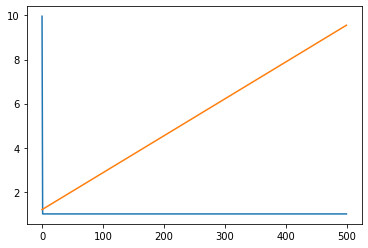

In [24]:
import matplotlib.pyplot as plt
plt.plot(prey_val.detach().numpy())
plt.plot(predator_val.detach().numpy())
plt.show()

In [ ]:
for i in net_x.parameters():
    print(i)

Parameter containing:
tensor([[-0.9301]], requires_grad=True)
Parameter containing:
tensor([3.6346], requires_grad=True)
Parameter containing:
tensor([[6.1271]], requires_grad=True)
Parameter containing:
tensor([4.0172], requires_grad=True)


# Test2

In [9]:
#t_test_collocation = np.random.uniform(low=0.0, high=10.0, size=(500,1))
t_test_collocation = np.linspace(0,500,500).reshape((500,1))
pt_t_test_collocation = Variable(torch.Tensor(t_test_collocation).float(), requires_grad=True).to(device)

In [18]:
x_ = net_x(pt_t_test_collocation)
prey_val = x_  + (torch.autograd.grad(x_.sum(), pt_t_test_collocation, create_graph=True)[0])

In [14]:
t_test_collocation[2] - t_test_collocation[1]

array([1.00200401])

In [19]:
v_ = net_y(pt_t_test_collocation)
predator_val =  v_ + (torch.autograd.grad(v_.sum(), pt_t_test_collocation, create_graph=True)[0])

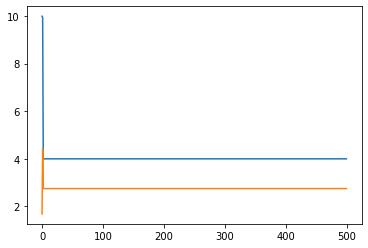

In [20]:
import matplotlib.pyplot as plt
plt.plot(prey_val.detach().numpy())
plt.plot(predator_val.detach().numpy())
plt.show()